## Observations and Insights 

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_rpt_df = pd.merge(mouse_metadata,study_results,how='outer', on='Mouse ID')

# Display the data table for preview

mouse_rpt_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
num_mice = mouse_rpt_df.drop_duplicates('Mouse ID')['Mouse ID'].count()
print("Total number of mice in study: " + str(num_mice))

Total number of mice in study: 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_rpt_df['Duplicate'] = mouse_rpt_df.duplicated(['Mouse ID','Timepoint'])
dup_mouse = mouse_rpt_df[mouse_rpt_df['Duplicate']
                          ==True].drop_duplicates(['Mouse ID'])

dup_mouseid = dup_mouse['Mouse ID'].tolist()

print("Mouse ID: " + str(dup_mouseid))
print("Shows up as a duplicate for Mouse ID and Timepoint")

Mouse ID: ['g989']
Shows up as a duplicate for Mouse ID and Timepoint


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
lsdup_mouse = mouse_rpt_df.loc[mouse_rpt_df['Mouse ID']=='g989']
lsdup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,False
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,False
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,False
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,False
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cmousend_rpt_df = mouse_rpt_df.loc[mouse_rpt_df['Mouse ID']!='g989']
cmousend_rpt_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [7]:
# Checking the number of mice in the clean DataFrame.
num_micend = cmousend_rpt_df.drop_duplicates('Mouse ID')['Mouse ID'].count()
print("Total number of mice in clean DataFrame: " + str(num_micend))

Total number of mice in clean DataFrame: 248


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
treatls = pd.Series(cmousend_rpt_df['Drug Regimen'].unique())

rptlo = len(treatls)

ctdr = 0

stat_sum = []

for i in range(rptlo):
    capo_one = cmousend_rpt_df.loc[cmousend_rpt_df['Drug Regimen'] == treatls.iloc[ctdr]]
    c_one = {
        'Drug Regimen':treatls.iloc[ctdr],
        'Tumor Volume-Mean' : capo_one['Tumor Volume (mm3)'].mean(),
        'Tumor Volume-Median' : capo_one['Tumor Volume (mm3)'].median(),
        'Tumor Volume-Variance' : capo_one['Tumor Volume (mm3)'].var(),
        'Tumor Volume-Std Dev' : capo_one['Tumor Volume (mm3)'].std(),
        'Tumor Volume-SEM' : capo_one['Tumor Volume (mm3)'].sem()
    }
    stat_sum.append(c_one)
    ctdr = ctdr + 1

statsum_df = pd.DataFrame(stat_sum)
statsum2_df = statsum_df.set_index('Drug Regimen')
statsum2_df.style.format("{:.2f}")

# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Tumor Volume-Mean,Tumor Volume-Median,Tumor Volume-Variance,Tumor Volume-Std Dev,Tumor Volume-SEM
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.49,4.85,0.32
Capomulin,40.68,41.56,24.95,4.99,0.33
Infubinol,52.88,51.82,43.13,6.57,0.49
Placebo,54.03,52.29,61.17,7.82,0.58
Ceftamin,52.59,51.78,39.29,6.27,0.47
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52
Ketapril,55.24,53.70,68.55,8.28,0.60
Propriva,52.32,50.45,43.85,6.62,0.54


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cal_mean = cmousend_rpt_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
cal_median = cmousend_rpt_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
cal_variance = cmousend_rpt_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
cal_std_dev = cmousend_rpt_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
cal_sem = cmousend_rpt_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_statistics = pd.DataFrame({
    'Tumer Volume-Mean':cal_mean,
    'Tumer Volume-Median':cal_median,
    'Tumer Volume-Variance':cal_variance,
    'Tumer Volume-Std Dev':cal_std_dev,
    'Tumer Volume-SEM':cal_sem
})
summary_statistics.style.format('{:.2f}')

,Tumer Volume-Mean,Tumer Volume-Median,Tumer Volume-Variance,Tumer Volume-Std Dev,Tumer Volume-SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
pd.options.display.float_format = '{:.2f}'.format
cmousend_rpt_df.groupby(['Drug Regimen']).agg({
    'Tumor Volume (mm3)': ['mean','median','var','std','sem']})

Tumor Volume (mm3)                       
                           mean median   var  std  sem
Drug Regimen                                          
Capomulin                 40.68  41.56 24.95 4.99 0.33
Ceftamin                  52.59  51.78 39.29 6.27 0.47
Infubinol                 52.88  51.82 43.13 6.57 0.49
Ketapril                  55.24  53.70 68.55 8.28 0.60
Naftisol                  54.33  52.51 66.17 8.13 0.60
Placebo                   54.03  52.29 61.17 7.82 0.58
Propriva                  52.32  50.45 43.85 6.62 0.54
Ramicane                  40.22  40.67 23.49 4.85 0.32
Stelasyn                  54.23  52.43 59.45 7.71 0.57
Zoniferol                 53.24  51.82 48.53 6.97 0.52

## Bar and Pie Charts

<IPython.core.display.Javascript object>


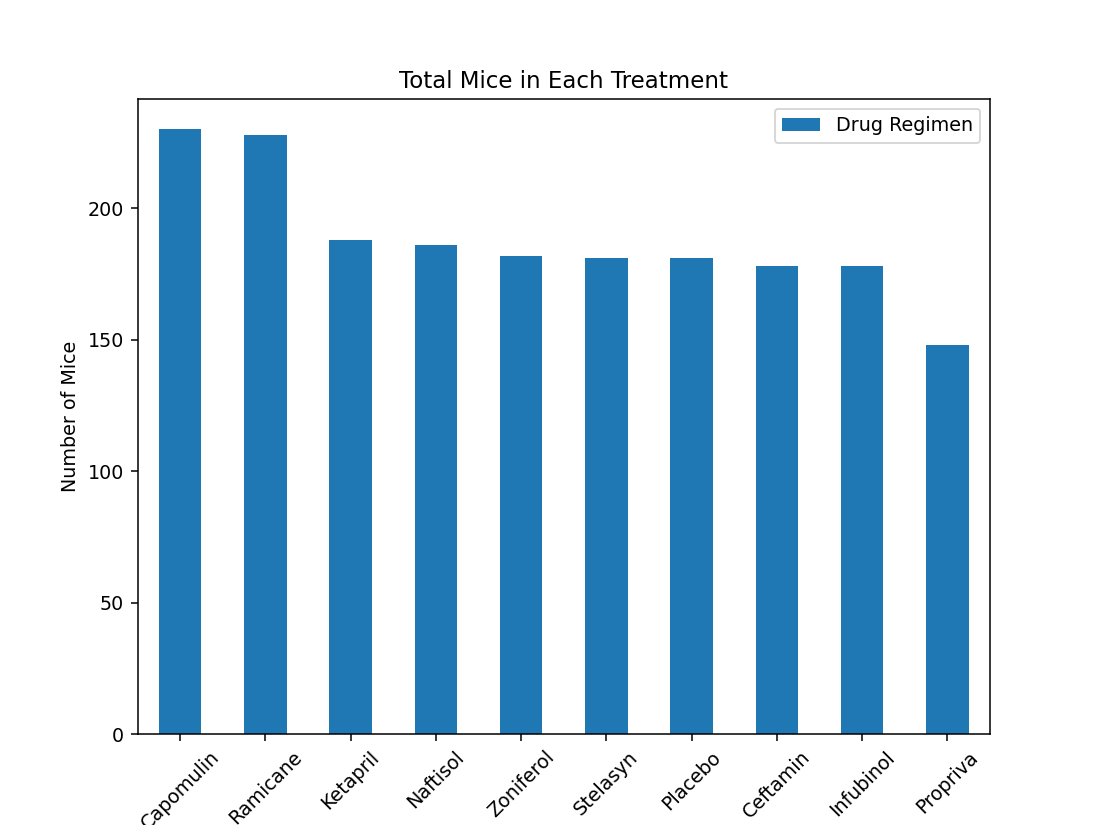

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treat_ct = cmousend_rpt_df['Drug Regimen'].value_counts()

treat_ct.plot(kind='bar', rot=45, figsize=(8,6),
                           title='Total Mice in Each Treatment',
                           ylabel='Number of Mice',xlabel='Drug Regimen', label='Drug Regimen')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


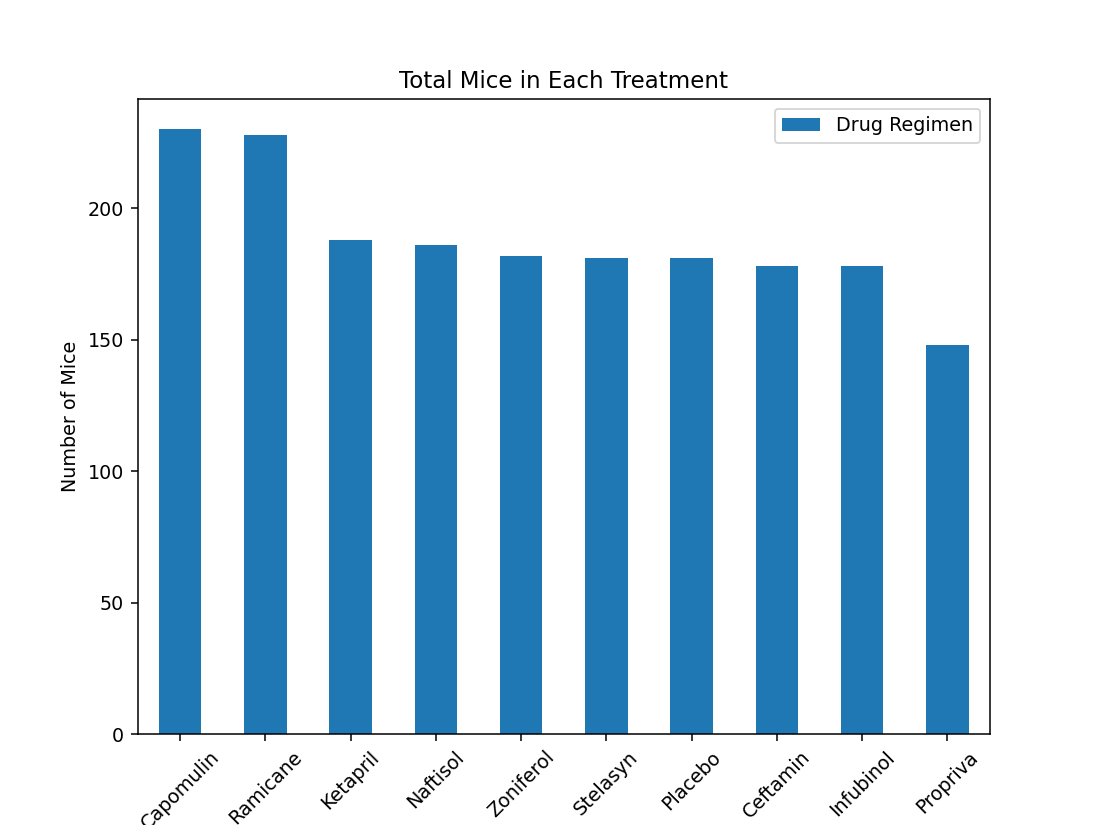

In [57]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
bpcmousend_rpt_df = cmousend_rpt_df['Drug Regimen'].value_counts()
treat_ct = cmousend_rpt_df['Drug Regimen'].nunique()
y_treat_ct = len(cmousend_rpt_df.groupby(['Drug Regimen']))
x_axis = np.arange(0,treat_ct,1)

bpcmousend_rpt_df.plot(kind='bar',x=x_axis, y=y_treat_ct, rot=45, figsize=(8,6),
                           title='Total Mice in Each Treatment',
                           ylabel='Number of Mice',xlabel='Drug Regimen')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


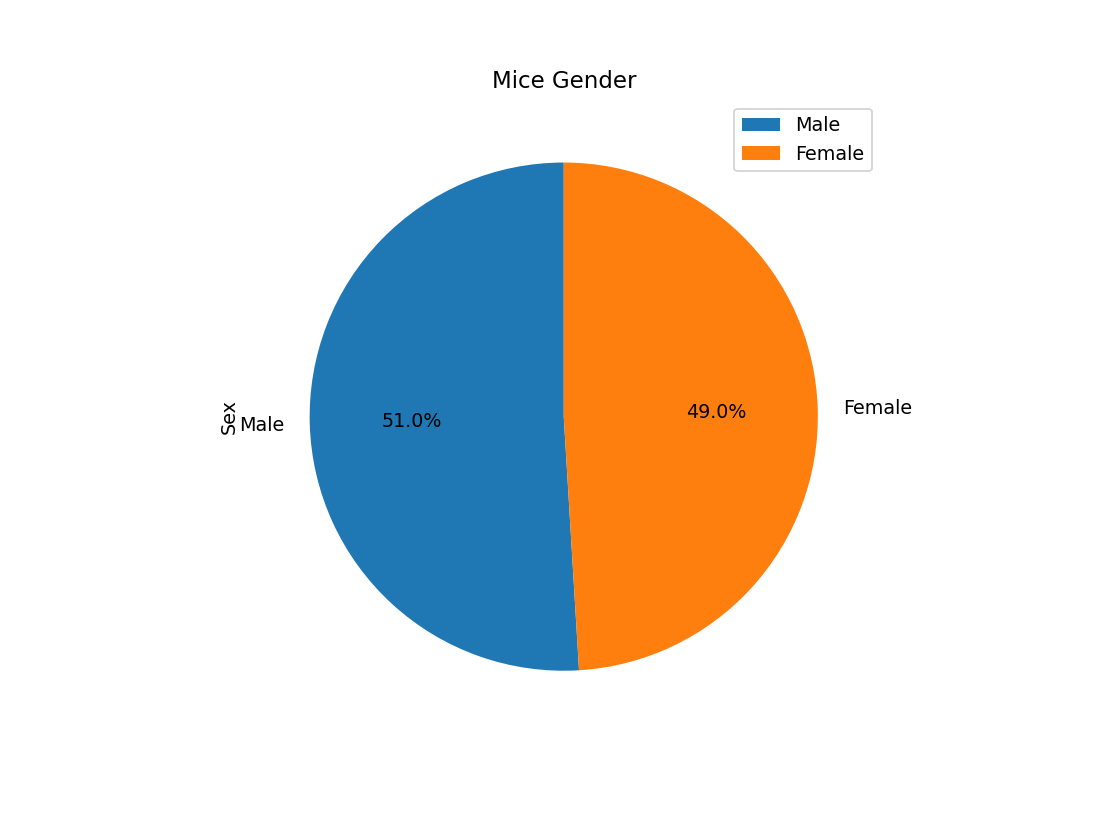

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_cmouse_df = cmousend_rpt_df['Sex'].value_counts()

pie_cmouse_df.plot(kind = 'pie', figsize=(8, 6), startangle=90, autopct='%1.1f%%',
                  title='Mice Gender')

plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


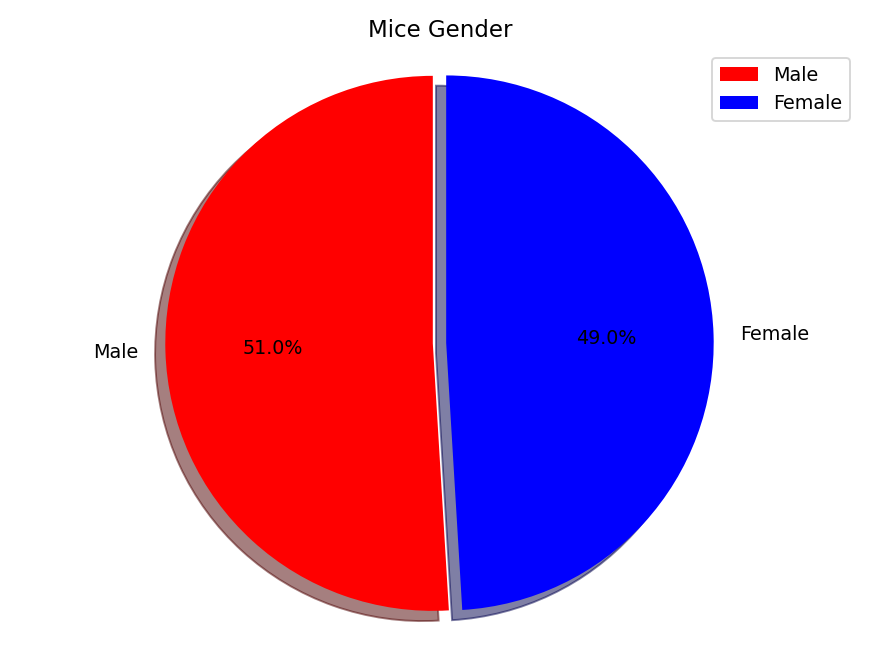

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = cmousend_rpt_df['Sex'].unique()
sizes = cmousend_rpt_df['Sex'].value_counts()
colors = ['red','blue']
explode = [.05,0]
plt.pie(sizes, labels=labels ,colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, explode=explode)
plt.legend(loc='best')
plt.title('Mice Gender')
plt.axis('equal')
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [77]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
calfmicer = cmousend_rpt_df[['Mouse ID','Timepoint']]
calfmicer.set_index('Mouse ID', inplace=True)
mg_micers = calfmicer.max(level='Mouse ID')
mg_micers.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ltp_tumvol = pd.merge(mg_micers,cmousend_rpt_df, how='inner', on=['Mouse ID','Timepoint'])
cric_ltp_tumvol = ltp_tumvol.loc[(ltp_tumvol['Drug Regimen'] == 'Capomulin') |
                                (ltp_tumvol['Drug Regimen'] == 'Ceftamin') |
                                (ltp_tumvol['Drug Regimen'] == 'Infubinol') |
                                (ltp_tumvol['Drug Regimen'] == 'Ramicane')]

cric_ltp_tumvol.sort_values('Drug Regimen')

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicate
32,j246,35,Capomulin,Female,21,21,38.75,1,False
36,v923,45,Capomulin,Female,19,21,40.66,2,False
35,w150,10,Capomulin,Male,23,23,39.95,0,False
34,j119,45,Capomulin,Female,7,23,38.13,1,False
39,l509,45,Capomulin,Male,17,21,41.48,3,False
...,...,...,...,...,...,...,...,...,...
46,r921,30,Ramicane,Female,5,25,43.42,1,False
47,w678,5,Ramicane,Female,5,24,43.17,0,False
48,y449,15,Ramicane,Male,19,24,44.18,0,False
23,r811,45,Ramicane,Male,9,19,37.23,1,False


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_lst = list(cmousend_rpt_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatment_lst:
    data_for_tumor_vol = cmousend_rpt_df.loc[cmousend_rpt_df['Drug Regimen']== drug, ['Tumor Volume (mm3)']]
    tumor_vol_data.append(data_for_tumor_vol)
    
    
#     cri_tumvol = cmousend_rpt_df.loc[(cmousend_rpt_df['Drug Regimen'] == 'Capomulin') |
#                                 (cmousend_rpt_df['Drug Regimen'] == 'Ceftamin') |
#                                 (cmousend_rpt_df['Drug Regimen'] == 'Infubinol') |
#                                 (cmousend_rpt_df['Drug Regimen'] == 'Ramicane')]

# mtv_tumvol = cri_tumvol['Tumor Volume (mm3)']
#     # add subset

    # Determine outliers using upper and lower bounds
# quant_tumorvol = tumor_vol_data_df.quantile([0.25,0.5,0.75])
# lquant_tumorvol = quant_tumorvol[0.25] 
# uquant_tumorvol = quant_tumorvol[0.75]

# iqr_tumorvol = uquant_tumorvol - lquant_tumorvol

# unbound = uquant_tumorvol + 1.5 * iqr_tumorvol
# lnbound = lquant_tumorvol - 1.5 * iqr_tumorvol

# crio_tumorvol = cri_tumorvol.loc[(cri_tumorvol['Tumor Volume (mm3)'] < lnbound) | (cri_tumorvol['Tumor Volume (mm3)'] > unbound)]
# print(f"Upper Bound  {lnbound}, Lower Bound {unbound}")
# print('List of outliers')
# crio_tumorvol
tumor_vol_data

[     Tumor Volume (mm3)
 0                 45.00
 1                 38.83
 2                 35.01
 3                 34.22
 4                 33.00
 ..                  ...
 449               43.17
 450               45.00
 451               45.88
 452               46.38
 453               44.18
 
 [228 rows x 1 columns],
       Tumor Volume (mm3)
 10                 45.00
 11                 43.88
 12                 37.61
 13                 38.18
 14                 36.87
 ...                  ...
 440                47.69
 1452               45.00
 1453               45.60
 1454               46.06
 1455               46.54
 
 [230 rows x 1 columns],
       Tumor Volume (mm3)
 454                45.00
 455                48.51
 456                51.85
 457                52.78
 458                55.17
 ...                  ...
 1868               54.32
 1869               56.29
 1870               58.63
 1871               60.05
 1872               62.75
 
 [178 rows x 1 colum

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
